Think Stats - Chapter 3: Cumulative Distribution Functions

In [258]:
import math
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import percentileofscore, norm
#from sklearn.utils import resample
from scipy.signal import resample

The Class Size Paradox:
For a probability distribution, the mean calculated from its PMF is lower than the one calculated by taking a sample from it. Students tend to experience a greater number of classmates than the true average class size, because a disproportionately large number of those experiences are in the large lectures. Because those classes have more students in them. This paradox is related to the phenomenon that your Facebook friends have, on average, more friends than you do.

In [2]:
#Build a PMF of the college size perceived by the Dean. 
college_info = {7:8, 12:8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}
college_info_list = []

for k,v in college_info.items():
    for i in range(v):
        college_info_list.append(k)
print(college_info_list)

college_info_list = pd.Series([v for v in college_info_list])

print('\nPMF of the college size perceived by the Dean:', round(college_info_list.mean(), 2))

[7, 7, 7, 7, 7, 7, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 22, 22, 22, 22, 27, 27, 27, 27, 27, 27, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 37, 37, 37, 37, 37, 37, 37, 37, 42, 42, 42, 47, 47]

PMF of the college size perceived by the Dean: 23.69


In [3]:
#Build a PMF of the college size perceived by a group of students.
college_info_list = []

for k,v in college_info.items():
    for i in range(k * v):
        college_info_list.append(k)
print(college_info_list)

college_info_list = pd.Series([v for v in college_info_list])

print('\nPMF of the college size perceived by the students:', round(college_info_list.mean(), 2))

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,

The difference can be viewed this way: the Dean's average is the expected class size when picking a class at random, while the student's average is the expected class size when picking a student at random and asking the size of that student's class. This is the sense in which we are 'biasing' class sizes: to give a student's-eye view of the class distribution.

The Limits of PMFs: PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

In [82]:
data = pd.read_fwf("2002FemPreg.dat", names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb","birthwgt_oz", 
                                             "prglength", "outcome", "birthord", "agepreg", "finalwgt"],
                                      colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
data.head(10)

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,18.0,12999.542264
5,6,1.0,1.0,8.0,9.0,38,1,1.0,27.0,8874.440799
6,6,1.0,2.0,9.0,9.0,40,1,2.0,28.0,8874.440799
7,6,1.0,2.0,8.0,6.0,42,1,3.0,30.0,8874.440799
8,7,1.0,1.0,7.0,9.0,39,1,1.0,28.0,6911.879921
9,7,1.0,2.0,6.0,10.0,35,1,2.0,32.0,6911.879921


In [83]:
#1lb = 16oz (we have 2 different weight measures, so we will need to deal with this)
first_babies = data[(data['outcome'] == 1) & (data['birthord'] == 1)][['birthwgt_oz', 'birthwgt_lb']].dropna()
first_babies.head()

,birthwgt_oz,birthwgt_lb
0,13.0,8.0
2,2.0,9.0
5,9.0,8.0
8,9.0,7.0
10,13.0,7.0


In [84]:
others = data[(data['outcome'] == 1) & (data['birthord'] != 1)][['birthwgt_oz', 'birthwgt_lb']].dropna()
others.head()

,birthwgt_oz,birthwgt_lb
1,14.0,7.0
3,0.0,7.0
4,3.0,6.0
6,9.0,9.0
7,6.0,8.0


In [85]:
#1lb = 16oz (we are going to convert lb to oz)
first_babies = first_babies['birthwgt_lb']*16 + first_babies['birthwgt_oz']
first_babies

0        141.0
2        146.0
5        137.0
8        121.0
10       125.0
         ...  
13576    103.0
13578     96.0
13581    102.0
13584    102.0
13588     99.0
Length: 4381, dtype: float64

In [86]:
others = others['birthwgt_lb']*16 + others['birthwgt_oz']
others

1        126.0
3        112.0
4         99.0
6        153.0
7        134.0
         ...  
13572     93.0
13574     98.0
13579    112.0
13591    120.0
13592    120.0
Length: 4706, dtype: float64

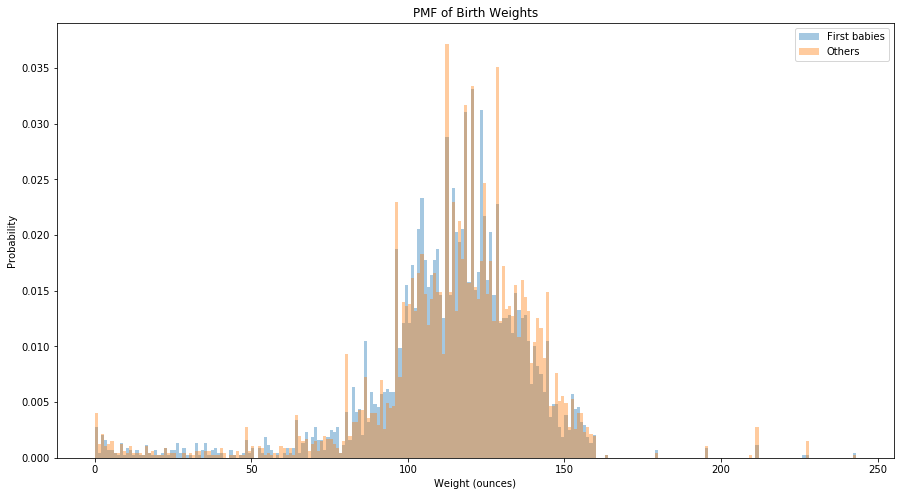

In [188]:
bins = int(max(first_babies.max(), others.max()) - min(first_babies.min(), others.min()))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1,1,1)
sns.distplot(first_babies, label='First babies', bins=bins, kde=False, norm_hist=True)
sns.distplot(others, label='Others', bins=bins, kde=False, norm_hist=True)
ax.set_xlabel('Weight (ounces)')
ax.set_ylabel('Probability')
ax.set_title('PMF of Birth Weights')
plt.legend()
plt.show()

Overall, these distributions resemble the familiar "bell curve", with many values near the mean and a few values much higher and lower. But parts of the figure above are hard to interpret and in order to mitigate this problem we can use bins. An alternative that avoids these problems is the Cumulative Distribution function (CDF).

Percentiles:
A percentile is a number where a certain percentage of scores fall below that number. The 25th percentile is also called the first quartile. The 50th percentile is generally the median. The 75th percentile is also called the third quartile. The difference between the third and first quartiles is the interquartile range. A Percentile Rank is the percent of cases that are at or below a score. Percentile Ranks are useful for comparing measurements from different tests, or tests applied to different groups. For example, people who compete in foot races are usually grouped by age and gender. To compare people in different groups, you can convert race times to percentile ranks.

In [137]:
def percentile(data, percentile):
    size = len(data)
    sorted_data = sorted(data)
    index = math.ceil((size * percentile) / 100) - 1
    return sorted_data[index]

ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
print(percentile(ages, 50)) #50th percentile of ages
print(np.percentile(ages, 50)) 

31
31.0


In [138]:
def percentile_rank(data, value):
    count = 0
    for val in data:
        if val <= value:
            count += 1
    percentile_rank = (100.0 * count) / len(data)
    return percentile_rank

print(percentile_rank(ages, 61))
print(percentileofscore(ages, 61))

90.47619047619048
90.47619047619048


Cumulative Distribution Functions: The CDF is the function that maps values to their percentile rank in a distribution. It calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than (or equal to) a certain value.

In [177]:
def cdf(sample, value):
    count = 0.0
    for val in sample:
        if val <= value:
            count += 1.0
    probability = count / len(sample)
    return probability

values = [1, 2, 2, 3, 5]
mean = pd.Series(values).mean()
std = pd.Series(values).std()
print(cdf(values, 3)) #cumulative probability of appearing a value less than (or equal to) 3 
print(norm.cdf(3, loc=mean, scale=std)) #cumulative probability of appearing a value less than 3 

0.8
0.6040145611706329


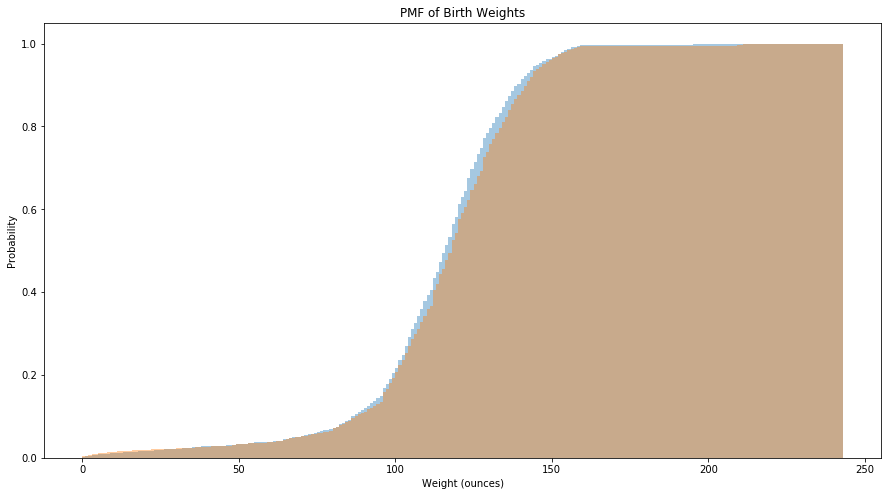

In [186]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1,1,1)
sns.distplot(first_babies, label='First babies', bins=bins, kde=False, norm_hist=True, hist_kws={'cumulative': True})
sns.distplot(others, label='Others', bins=bins, kde=False, norm_hist=True, hist_kws={'cumulative': True})
ax.set_xlabel('Weight (ounces)')
ax.set_ylabel('Probability')
ax.set_title('PMF of Birth Weights')
plt.show()
#This figure makes the shape of the distributions, and the difference between them, much clearer.

Conditional Distributions: A conditional distribution is the distribution of a subset of the data which is selected according to a condition.

In [191]:
#Example: Overall rank in race is 97 out of 1633, so what is the percentile rank?
print((97.0 * 100) / 1633)

#Example 2: Overal rank in race (by division) is 26 out of 256, so what is the percentile rank?
print((26 * 100) / 256)

5.939987752602572
10.15625


Random Numbers: CDFs are useful for generating random numbers with a given distribution. The process of generating a random sample based on a measured sample is called resampling.

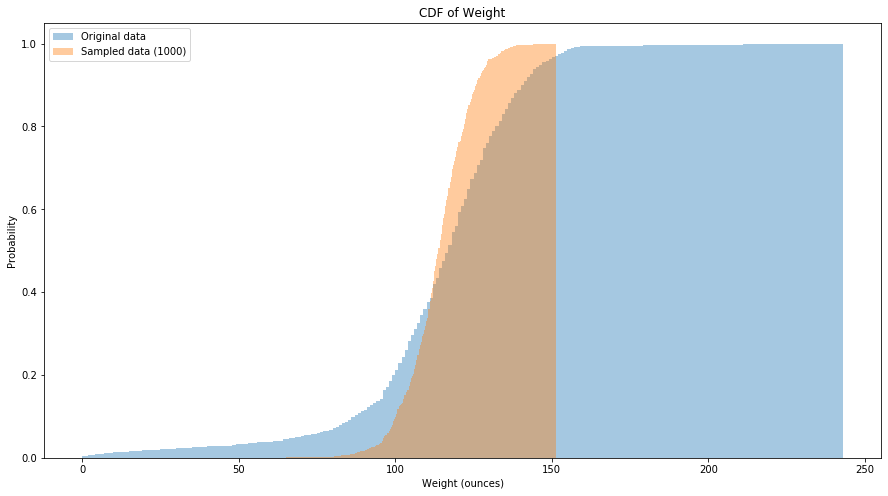

In [235]:
weights = data[data['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = weights['birthwgt_lb']*16 + weights['birthwgt_oz']

#resample(): Resample x to num samples using Fourier method along the given axis.
resampling = resample(x=weights, num=1000)

fig = plt.figure(figsize=(15, 8))
sns.distplot(weights, label='Original data', bins=bins, kde=False, norm_hist=True, hist_kws={'cumulative': True})
sns.distplot(resampling, label='Sampled data (1000)', bins=bins, kde=False, norm_hist=True, hist_kws={'cumulative': True})
plt.xlabel("Weight (ounces)")
plt.ylabel("Probability")
plt.title('CDF of Weight')
plt.legend(loc="best")
plt.show()

Summary Statistics: You can also compute other summary statistics once you've already computed the CDF. For example, the median is the 50th percentile. The 25th and 75th percentiles are often used to check whether a distribution is symmetric, and their difference, which is called the interquartile range.